### Kaggle competiton

## House Prices: Advanced Regression Techniques

Predict sales prices and practice feature engineering, RFs, and gradient boosting

In [1]:
import pandas as pd
import numpy as np

In [2]:
import statsmodels.api as sm

In [3]:
df0 = pd.read_csv('train.csv')

In [7]:
print df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [8]:
df0.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
df0.columns

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

In [11]:
df0['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [4]:
import seaborn as sns

AttributeError: 'function' object has no attribute 'fit'

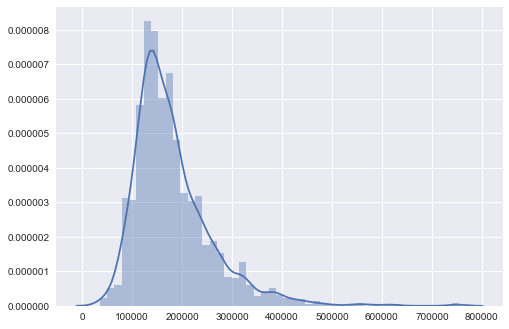

In [5]:
sns.distplot(df0['SalePrice'] ,fit=norm)

In [15]:
print ("Skewness: %f" %df0['SalePrice'].skew())
print ("Kurtosis: %f" %df0['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


* skewnes > 0 : 오른쪽 꼬리를 가지고, 왼쪽에 더 많은 데이터가 분포한다.
* kurtosis 가 6보다 크다: 확률 분포가 매우 뾰족하다. 중심 부위에 많은 데이터가 몰려 있다.

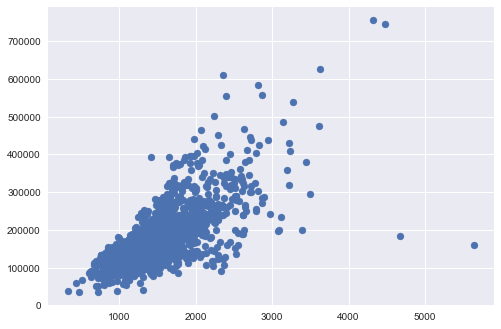

In [16]:
scatter(x=df0['GrLivArea'], y=df0['SalePrice'])

In [ ]:
df1.head()

In [ ]:
df1.ix[:,1:-1]

In [ ]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']

In [ ]:
sns.pairplot(df1[cols])
plt.show()

In [17]:
print ("mean: %f") %df0['SalePrice'].mean()
print ("std: %f") %df0['SalePrice'].std()
print ("median: %f") %df0['SalePrice'].median()
print ("skew: %f") %df0['SalePrice'].skew()
print ("kurtosis: %f") %df0['SalePrice'].kurt()

mean: 180921.195890
std: 79442.502883
median: 163000.000000
skew: 1.882876
kurtosis: 6.536282


In [22]:
numeric_col = df0._get_numeric_data().columns

In [23]:
numeric_col

Index([u'Id', u'MSSubClass', u'LotFrontage', u'LotArea', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'MasVnrArea',
       u'BsmtFinSF1', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'TotRmsAbvGrd', u'Fireplaces', u'GarageYrBlt',
       u'GarageCars', u'GarageArea', u'WoodDeckSF', u'OpenPorchSF',
       u'EnclosedPorch', u'3SsnPorch', u'ScreenPorch', u'PoolArea', u'MiscVal',
       u'MoSold', u'YrSold', u'SalePrice'],
      dtype='object')

In [24]:
numeric_col = numeric_col.drop('SalePrice')

In [28]:
c_cols = df0.columns.drop(numeric_col).drop('SalePrice')

In [29]:
c_cols

Index([u'MSZoning', u'Street', u'Alley', u'LotShape', u'LandContour',
       u'Utilities', u'LotConfig', u'LandSlope', u'Neighborhood',
       u'Condition1', u'Condition2', u'BldgType', u'HouseStyle', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual', u'BsmtCond',
       u'BsmtExposure', u'BsmtFinType1', u'BsmtFinType2', u'Heating',
       u'HeatingQC', u'CentralAir', u'Electrical', u'KitchenQual',
       u'Functional', u'FireplaceQu', u'GarageType', u'GarageFinish',
       u'GarageQual', u'GarageCond', u'PavedDrive', u'PoolQC', u'Fence',
       u'MiscFeature', u'SaleType', u'SaleCondition'],
      dtype='object')

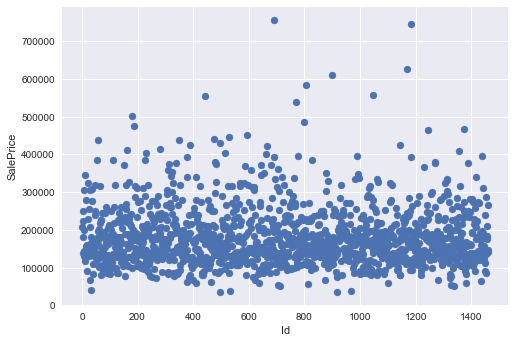

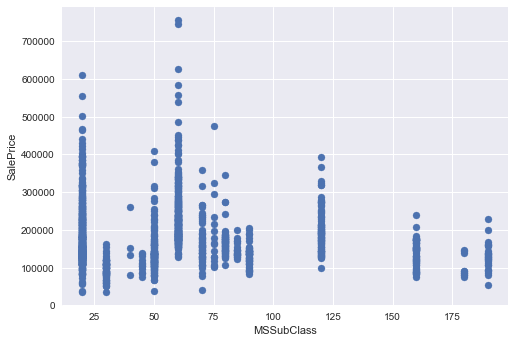

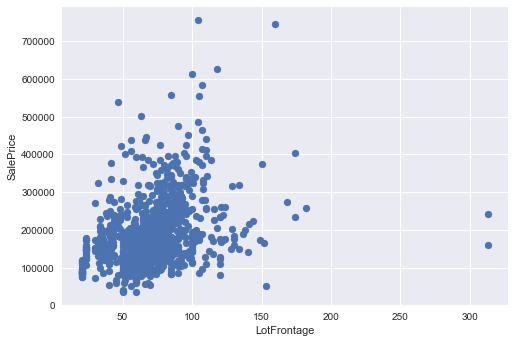

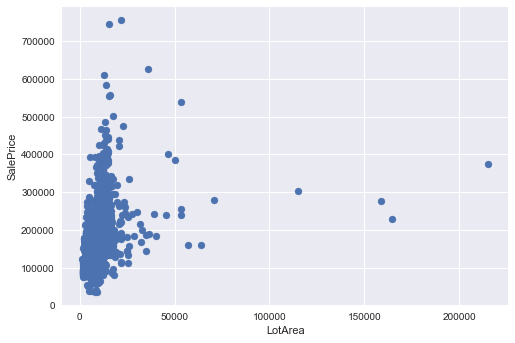

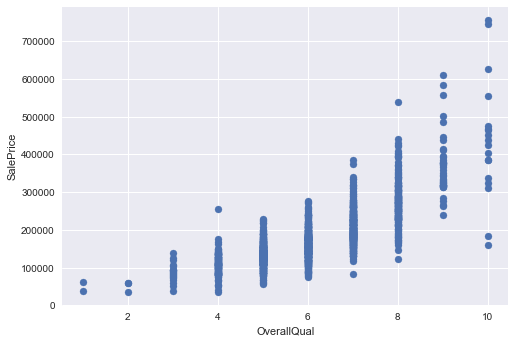

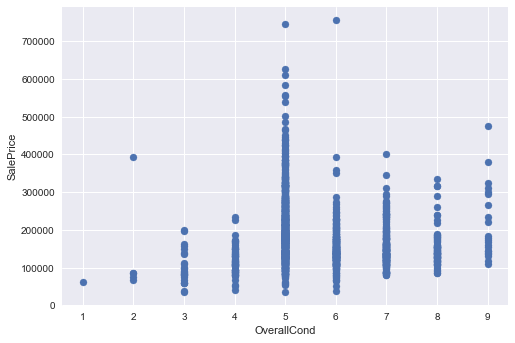

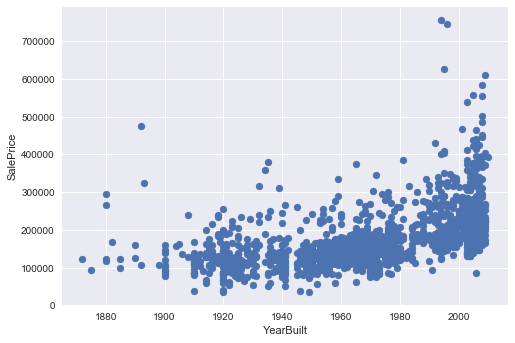

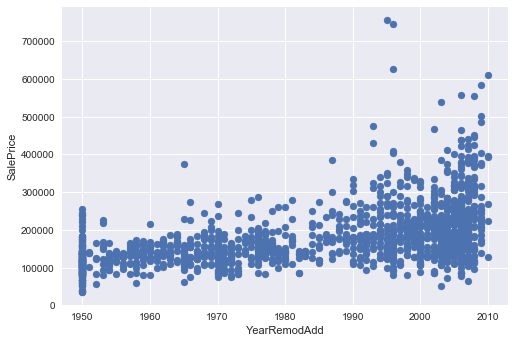

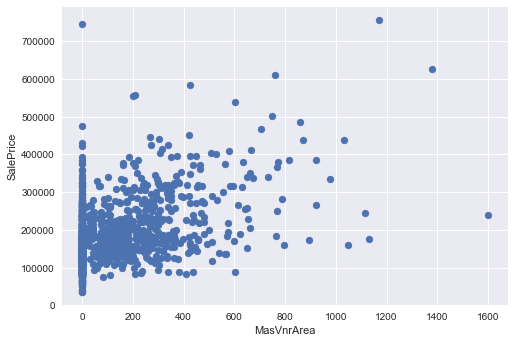

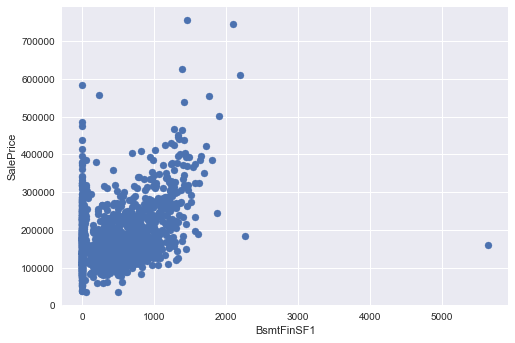

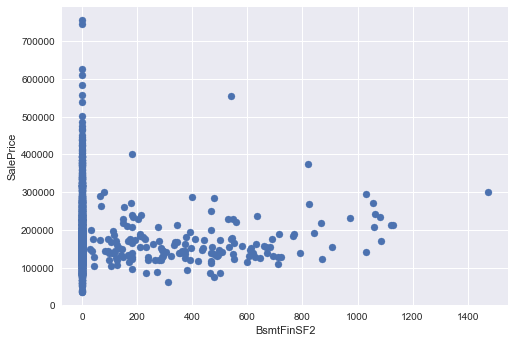

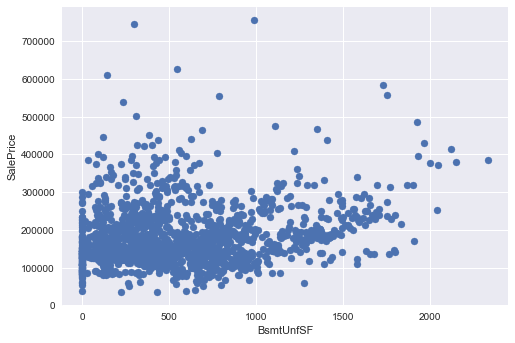

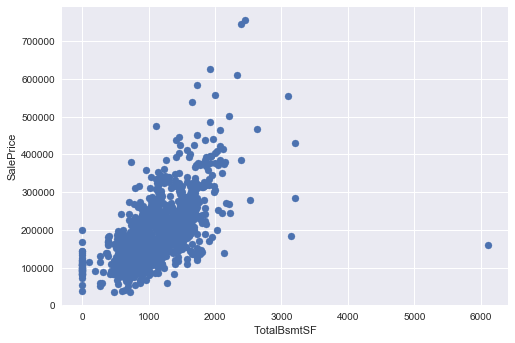

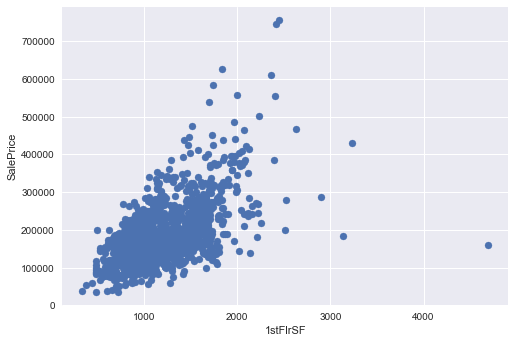

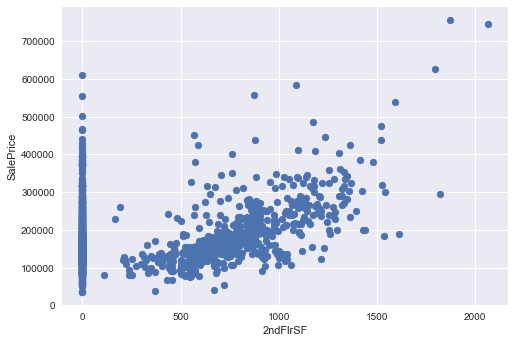

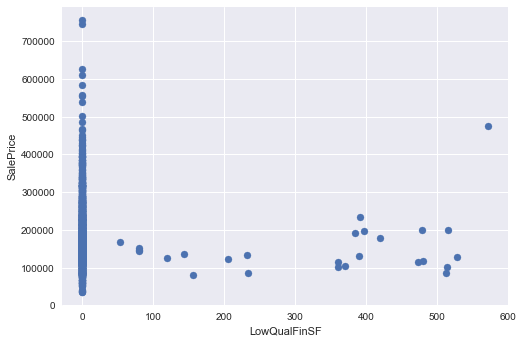

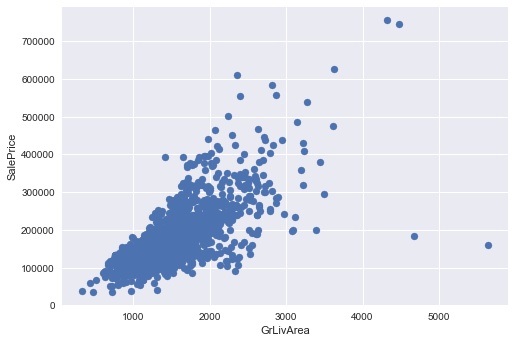

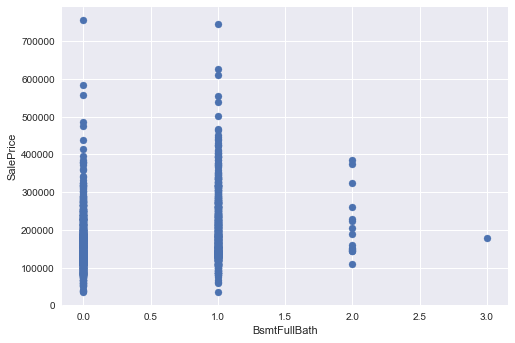

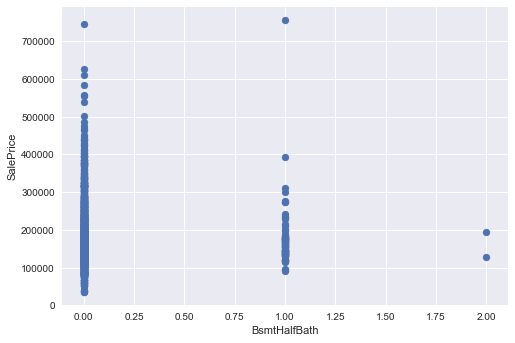

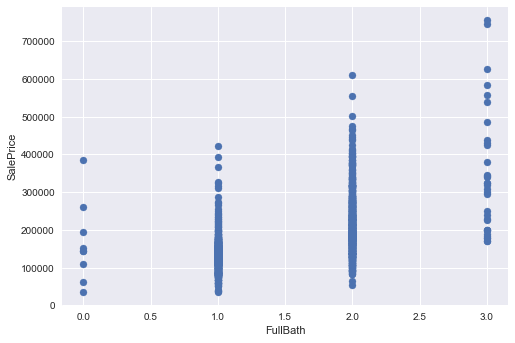

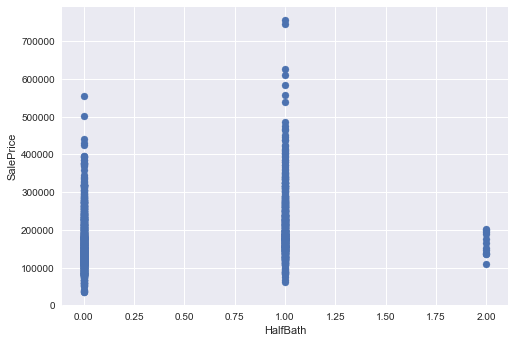

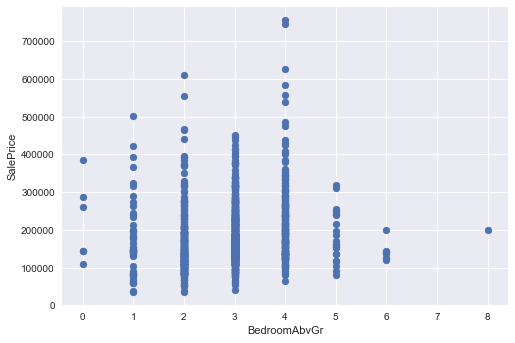

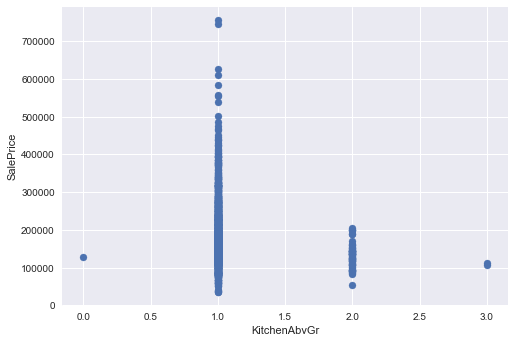

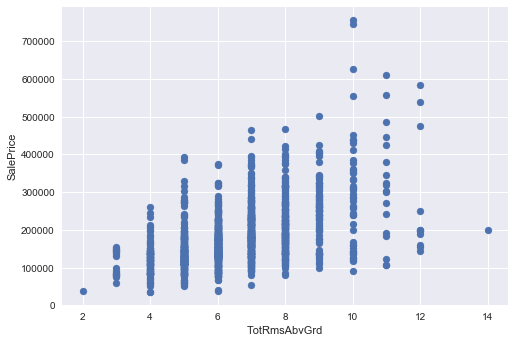

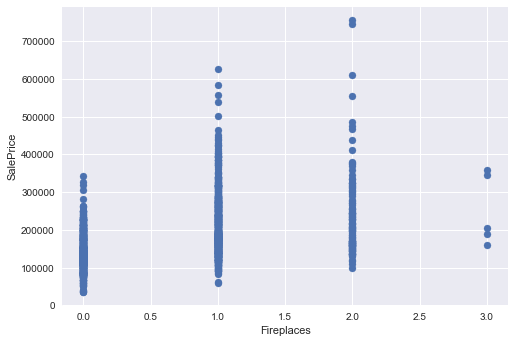

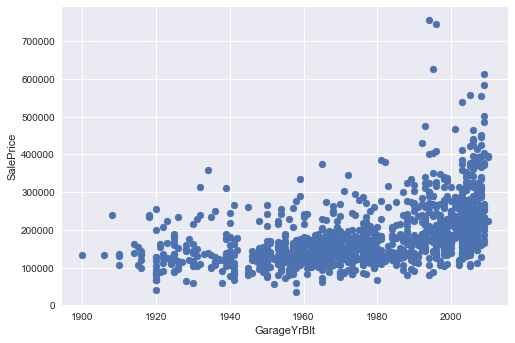

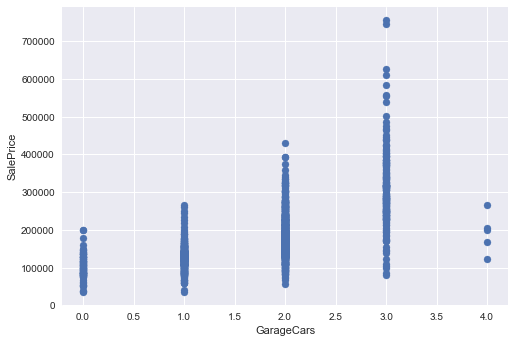

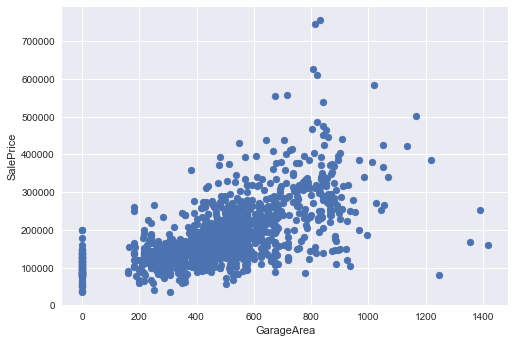

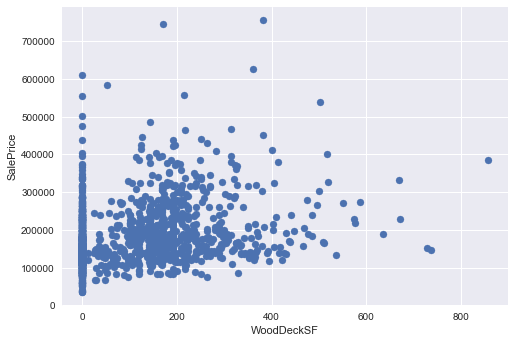

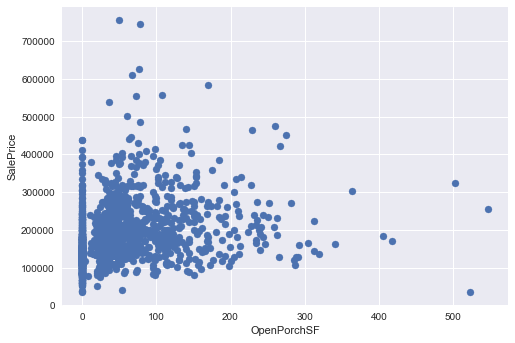

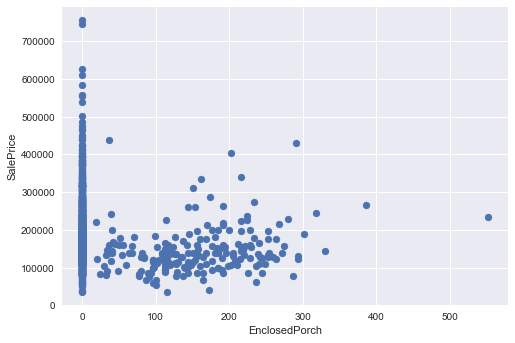

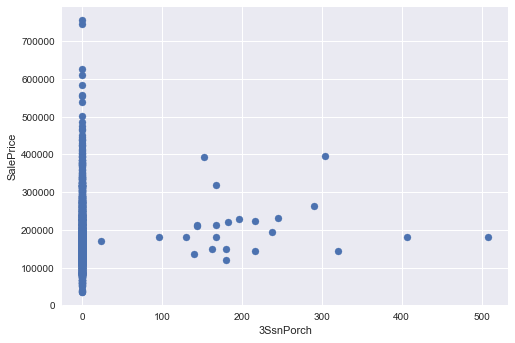

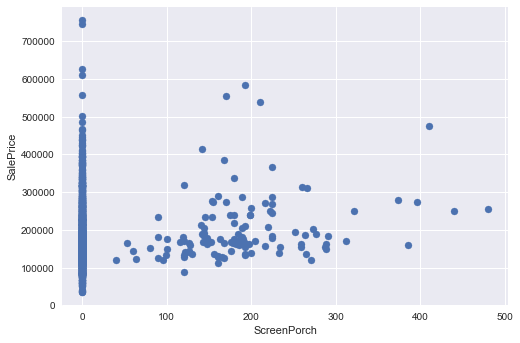

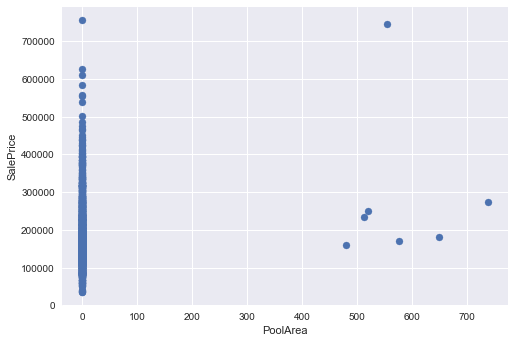

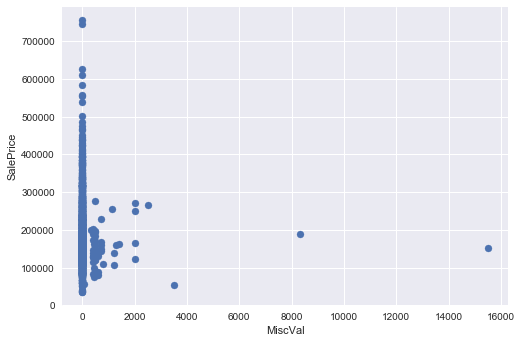

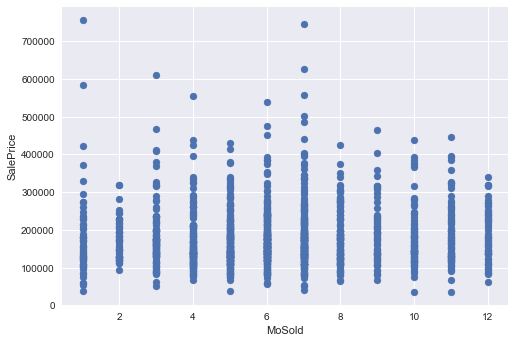

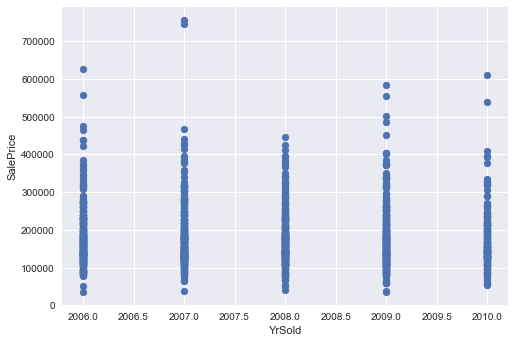

In [34]:
## pairplot으로 그리기에는 너무 많다. 
target = 'SalePrice'
y = df0[target].values
for x in numeric_col:
    X = df0[x].values
    plt.scatter(X,y)
    plt.xlabel(x)
    plt.ylabel(target)
    
    plt.show()

* 변수들과 y(SalePrice)의 관계를 산포도로 나타내면, 선형의 관계를 가진 x feature 들을 1차로 뽑아보면 
* 아래의 2개는 확실한 선형을 보이고 
- GrLivArea
- TotalBsmtSF
* 아래의 2개는 약한 선형이라고 볼수도 있다.
- 1stFlrSF
- 2ndFlrSF


* 4개의 변수들을 선택하여 pairplot을 그려본다. 


In [48]:
n_col2 = ['GrLivArea','TotalBsmtSF', '1stFlrSF','2ndFlrSF','SalePrice' ]

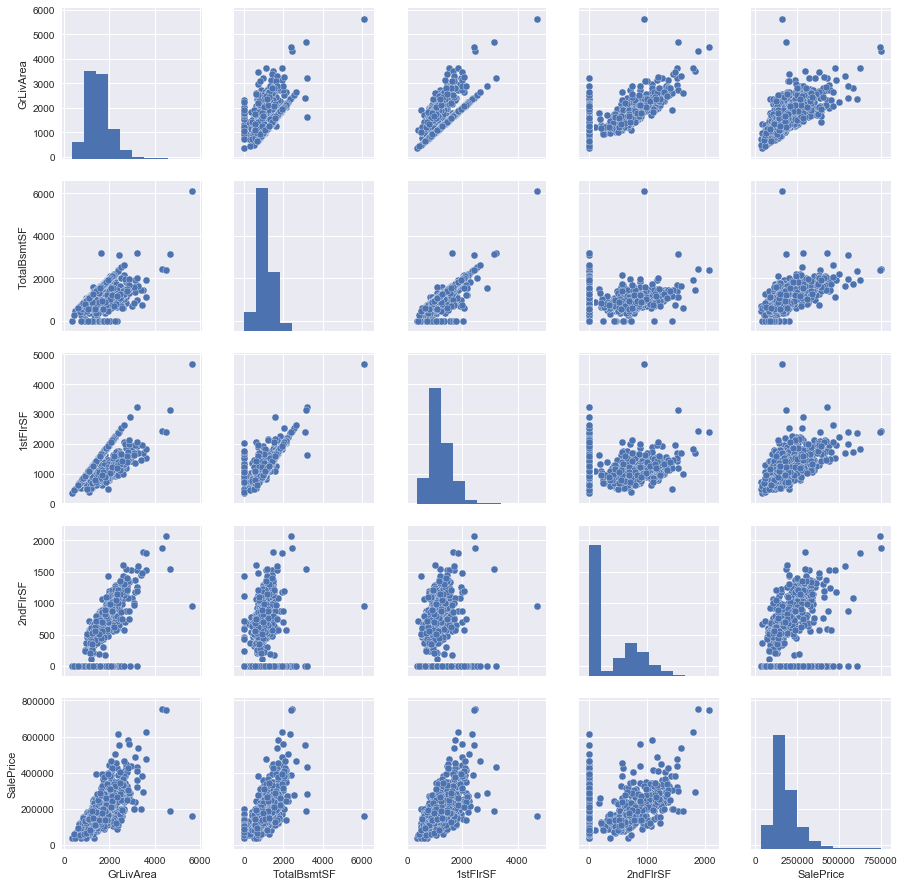

In [49]:
sns.pairplot(df0[n_col2])
plt.show()

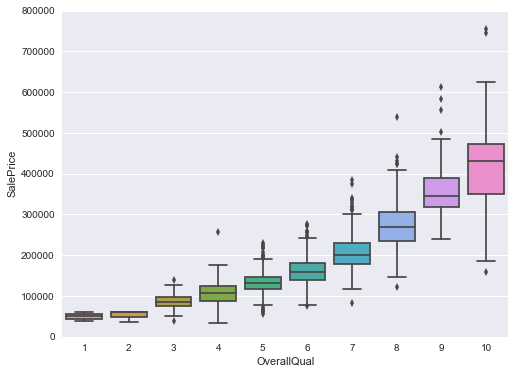

In [54]:
var = 'OverallQual'
data = pd.concat([df0['SalePrice'], df0[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

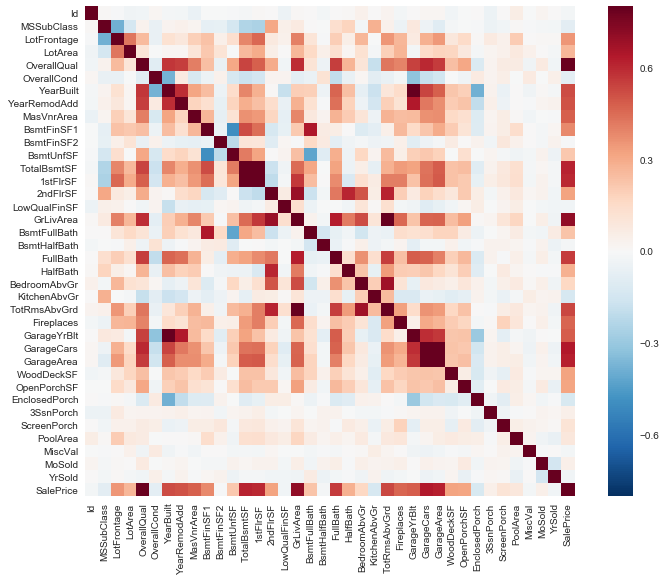

In [53]:
#correlation matrix
corrmat = df0.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

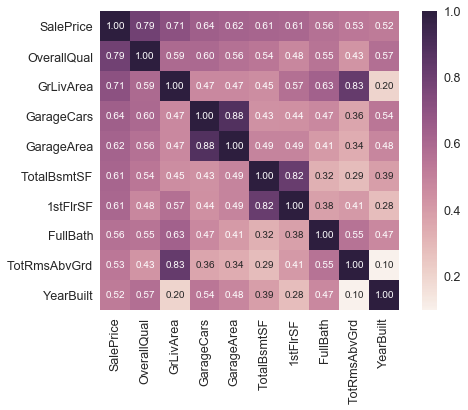

In [69]:
# 위에서처럼 numeric인지 아닌지로 나눠서 변수간에 별도로 볼 수도 있지만 
# 상관계수 매트릭스를 만들어서 가장 관계있는 변수들 순위에 따라서 heatmap을 그려보면 
# 훨씬 더 쉽게 변수를 골라낼 수가 있다. 

k = 10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df0[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot =True, square=True, fmt='.2f', annot_kws = {'size':10}, yticklabels= cols.values, xticklabels= cols.values)

plt.show()

In [70]:
cols

Index([u'SalePrice', u'OverallQual', u'GrLivArea', u'GarageCars',
       u'GarageArea', u'TotalBsmtSF', u'1stFlrSF', u'FullBath',
       u'TotRmsAbvGrd', u'YearBuilt'],
      dtype='object')

* GrLivArea와 TotRmsAbvGrd 는 큰 상관관계를 가진다. SalePrice와 상관관계가 더 높은 GrLivArea만 사용한다. 
* GarageCars, GarageArea도 서로 상관관계가 높다. SalePrice와 상관관계가 더 높은 GarageCars를 사용한다. 


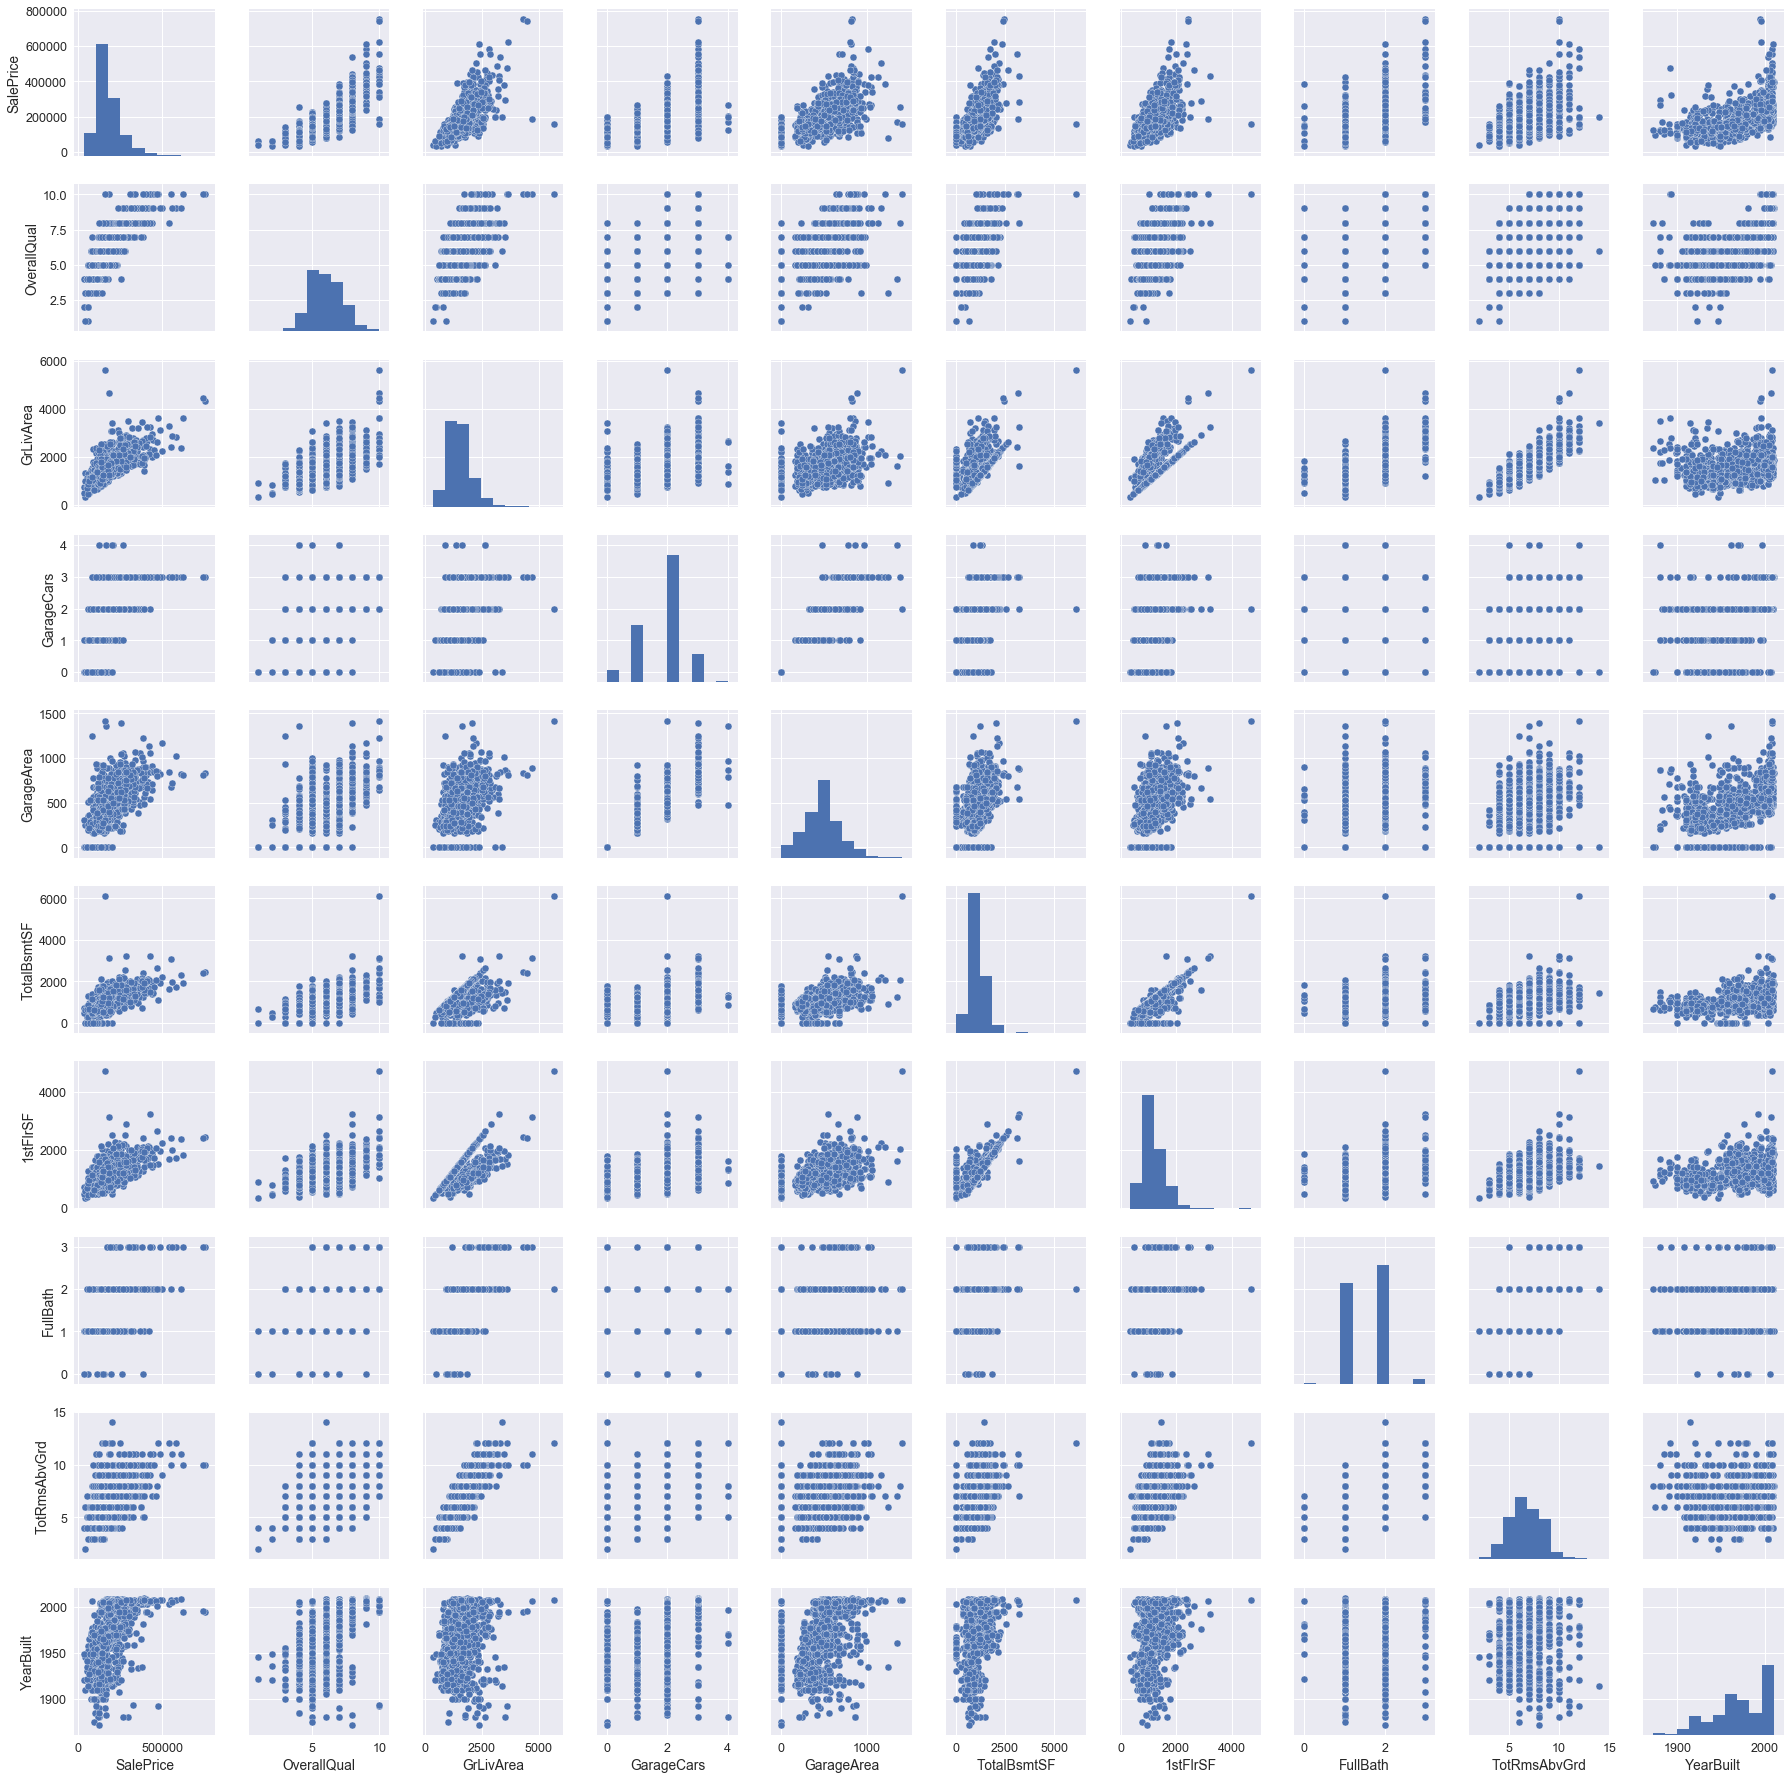

In [72]:
sns.pairplot(df0[cols])
plt.show()

Missing Data

In [77]:
total = df0.isnull().sum().sort_values(ascending = False)
percent = (df0.isnull().sum()/df0.isnull().count()).sort_values(ascending = False)
m_data = pd.concat([total,percent], axis = 1, keys =['Total', 'Percent'])
m_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [112]:
# null 데이터 값이 1% 이상인 column은 삭제하고, 
# 데이터 1개만 null인 u'Electrical은 row를 삭제한다. 
df1 = df0.copy()
df1 = df1.drop((m_data[m_data['Total']>1]).index,1)
df1 = df1.drop(df0.loc[df0['Electrical'].isnull()].index)
df1.isnull().sum().max()

0

In [113]:
# electrical 이 없는 것 지워서 1460 -- > 1459
len(df1)

1459

In [114]:
# null 1% 이상인 컬럼은 삭제해서 81---> 63개가됨
len(df1.columns)

63

In [94]:
from sklearn.preprocessing import StandardScaler

In [115]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(df1['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[ 3.82758058]
 [ 4.0395221 ]
 [ 4.49473628]
 [ 4.70872962]
 [ 4.728631  ]
 [ 5.06034585]
 [ 5.42191907]
 [ 5.58987866]
 [ 7.10041987]
 [ 7.22629831]]


In [96]:
cols

Index([u'SalePrice', u'OverallQual', u'GrLivArea', u'GarageCars',
       u'GarageArea', u'TotalBsmtSF', u'1stFlrSF', u'FullBath',
       u'TotRmsAbvGrd', u'YearBuilt'],
      dtype='object')

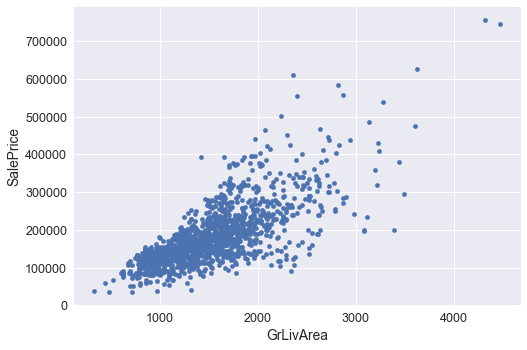

In [121]:
var = 'GrLivArea'
data = pd.concat([df1['SalePrice'], df1[var]], axis = 1)
data.plot.scatter(x = var, y = 'SalePrice')
plt.show()

GrLiveArea의 이상치로 보이는 값들이 정말 이상치인지 아닌지를 확신할 수가 없다. 

In [117]:
#deleting points
df1.sort_values(by = 'GrLivArea', ascending = False)[:2]
df1= df1.drop(df1[df1['Id'] == 1299].index)
df1 = df1.drop(df1[df1['Id'] == 524].index)

In [118]:
df1.sort_values(by = 'GrLivArea', ascending = False)[:2]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1182,1183,60,RL,15623,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,555,0,7,2007,WD,Abnorml,745000
691,692,60,RL,21535,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2007,WD,Normal,755000


가장 바깥에 있던 2개를 삭제하고 다시 다른 피쳐에 대해서 그래프 그려보면 
해당 피쳐의 outlier 도 삭제되어 있는 것을 확인할 수 있다. 

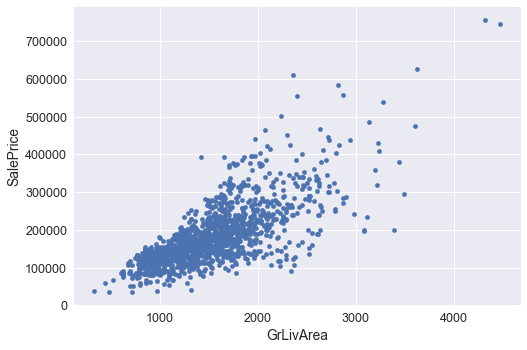

In [122]:
data.plot.scatter(x = var, y = 'SalePrice')
plt.show()

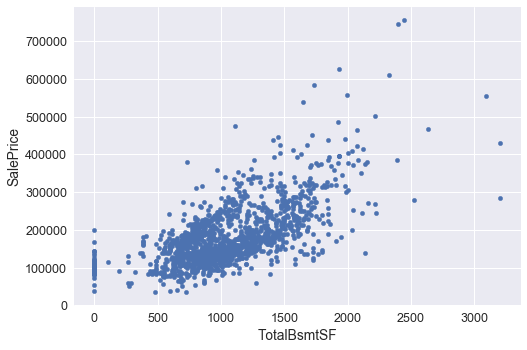

In [123]:
var = 'TotalBsmtSF'
data = pd.concat([df1['SalePrice'], df1[var]], axis = 1)
data.plot.scatter(x = var, y = 'SalePrice', )
plt.show()

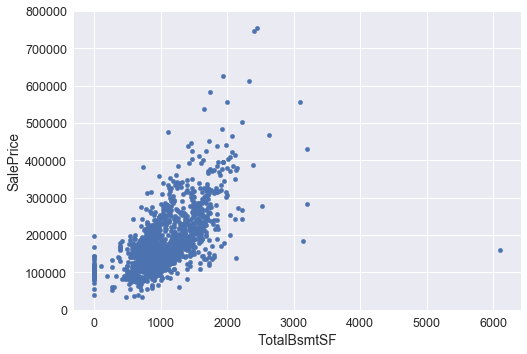

In [102]:
var = 'TotalBsmtSF'
data = pd.concat([df0['SalePrice'], df0[var]], axis = 1)
data.plot.scatter(x = var, y = 'SalePrice',ylim=(0,800000));


In [128]:
from scipy.stats import norm
from scipy import stats

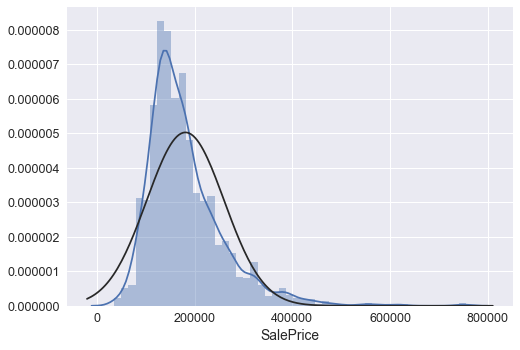

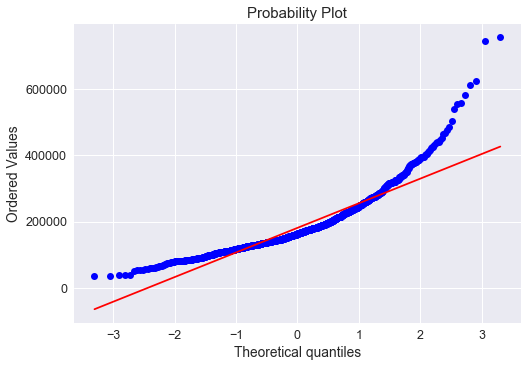

In [136]:
sns.distplot(df0['SalePrice'], fit = norm)
fig = plt.figure()
res = stats.probplot(df1['SalePrice'], plot = plt)
plt.show()

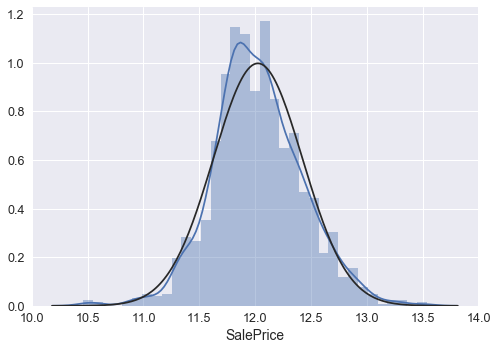

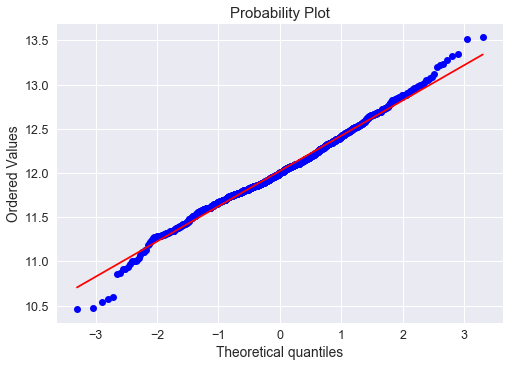

In [134]:
df1['SalePrice'] = np.log(df1['SalePrice'])
sns.distplot(df1['SalePrice'], fit = norm)
fig = plt.figure()
res = stats.probplot(df1['SalePrice'], plot = plt)

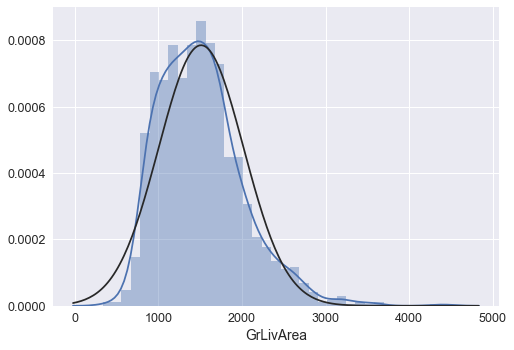

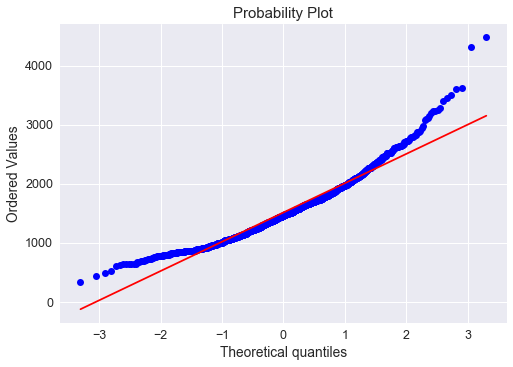

In [137]:
sns.distplot(df1['GrLivArea'], fit = norm)
fig = plt.figure()
res = stats.probplot(df1['GrLivArea'], plot = plt )

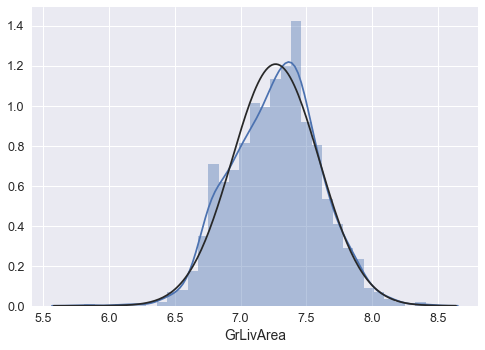

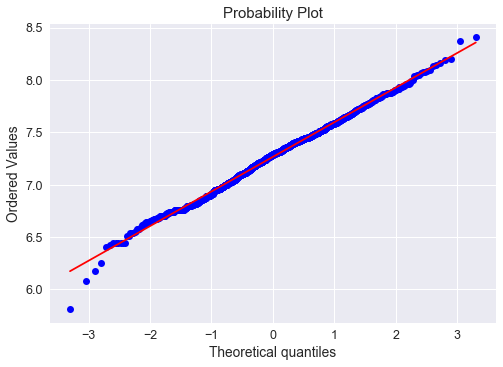

In [138]:
df1['GrLivArea'] = np.log(df1['GrLivArea'])
sns.distplot(df1['GrLivArea'], fit = norm)
fig = plt.figure()
res = stats.probplot(df1['GrLivArea'], plot = plt )

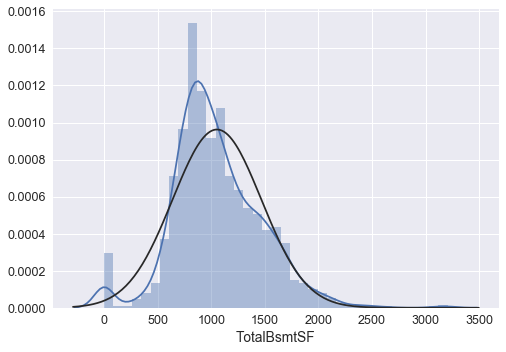

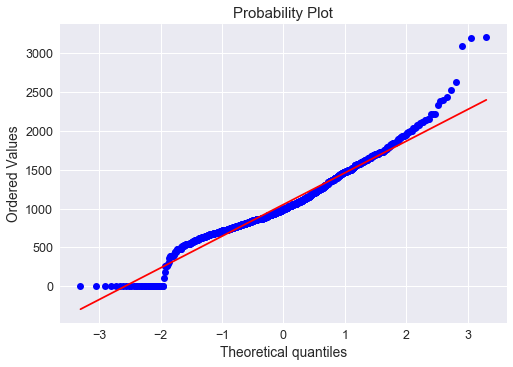

In [140]:
sns.distplot(df1['TotalBsmtSF'], fit = norm)
fig = plt.figure()
res = stats.probplot(df1['TotalBsmtSF'], plot = plt)

In [141]:
# 새로운 컬럼을 만들어서, 0보다 큰지 아닌지를 판별한다. 
# 0보다 큰 값의 인덱스만 뽑아서 TotalBsmtSF 를 전부 로그를 취하면
# 0값 때문에 로그를 못 취하던 부분을 해결할수 있다. 
# 그 값들만 probplot을 그려서 판단한다. 

df1['BsmtSF2'] = pd.Series(len(df1['TotalBsmtSF']), index= df1.index)
df1['BsmtSF2'] = 0
df1.loc[df1['TotalBsmtSF'] > 0 , 'BsmtSF2']

In [153]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
df1['BsmtSF2'] = pd.Series(len(df1['TotalBsmtSF']), index=df1.index)
df1['BsmtSF2'] = 0 
df1.loc[df1['TotalBsmtSF']>0,'BsmtSF2'] = 1

In [155]:
#transform data
df1.loc[df1['BsmtSF2']==1,'TotalBsmtSF'] = np.log(df1['TotalBsmtSF'])

C:\Users\UY Kim\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


In [150]:
df1.loc[df1['BsmtSF2']==1, 'TotalBdmtSF'] = np.log(df1['TotalBsmtSF'])

C:\Users\UY Kim\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


In [151]:
df1['TotalBsmtSF']

0        856
1       1262
2        920
3        756
4       1145
5        796
6       1686
7       1107
8        952
9        991
10      1040
11      1175
12       912
13      1494
14      1253
15       832
16      1004
17         0
18      1114
19      1029
20      1158
21       637
22      1777
23      1040
24      1060
25      1566
26       900
27      1704
28      1484
29       520
        ... 
1430     732
1431     958
1432     656
1433     936
1434    1126
1435    1319
1436     864
1437    1932
1438     912
1439     539
1440     588
1441     848
1442    1017
1443     952
1444    1422
1445     814
1446    1188
1447    1220
1448     560
1449     630
1450     896
1451    1573
1452     547
1453    1140
1454    1221
1455     953
1456    1542
1457    1152
1458    1078
1459    1256
Name: TotalBsmtSF, dtype: int64

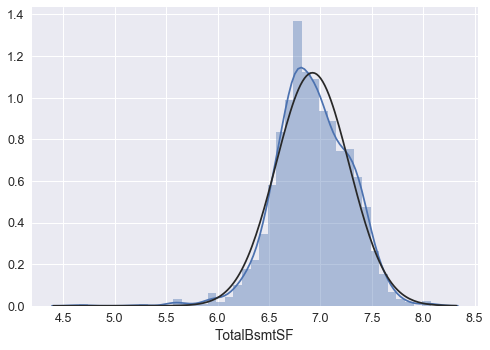

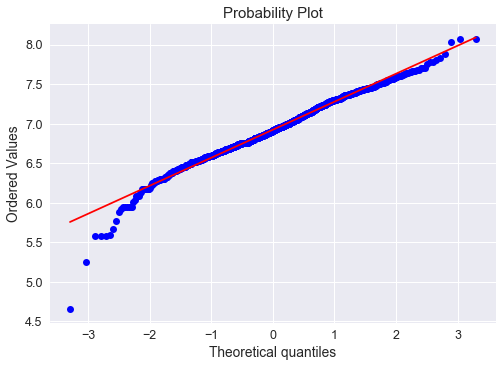

In [158]:
#histogram and normal probability plot
sns.distplot(df1[df1['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df1[df1['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

In [142]:
df1['BsmtSF2']

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      0
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
       ..
1430    1
1431    1
1432    1
1433    1
1434    1
1435    1
1436    1
1437    1
1438    1
1439    1
1440    1
1441    1
1442    1
1443    1
1444    1
1445    1
1446    1
1447    1
1448    1
1449    1
1450    1
1451    1
1452    1
1453    1
1454    1
1455    1
1456    1
1457    1
1458    1
1459    1
Name: BsmtSF2, dtype: int64

In [160]:
df1['TotalBsmtSF']

0       6.752270
1       7.140453
2       6.824374
3       6.628041
4       7.043160
5       6.679599
6       7.430114
7       7.009409
8       6.858565
9       6.898715
10      6.946976
11      7.069023
12      6.815640
13      7.309212
14      7.133296
15      6.723832
16      6.911747
17      0.000000
18      7.015712
19      6.936343
20      7.054450
21      6.456770
22      7.482682
23      6.946976
24      6.966024
25      7.356280
26      6.802395
27      7.440734
28      7.302496
29      6.253829
          ...   
1430    6.595781
1431    6.864848
1432    6.486161
1433    6.841615
1434    7.026427
1435    7.184629
1436    6.761573
1437    7.566311
1438    6.815640
1439    6.289716
1440    6.376727
1441    6.742881
1442    6.924612
1443    6.858565
1444    7.259820
1445    6.701960
1446    7.080026
1447    7.106606
1448    6.327937
1449    6.445720
1450    6.797940
1451    7.360740
1452    6.304449
1453    7.038784
1454    7.107425
1455    6.859615
1456    7.340836
1457    7.0492

In [162]:
df2 = sm.add_constant(df1)

In [184]:
model = sm.OLS(df2.ix[:,-1], df2.ix[:,:-1])
result = model.fit()

print (result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     1182.
Date:                Mon, 05 Jun 2017   Prob (F-statistic):               0.00
Time:                        19:31:41   Log-Likelihood:                 168.69
No. Observations:                1457   AIC:                            -329.4
Df Residuals:                    1453   BIC:                            -308.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const           6.7656      0.137     49.273      

In [166]:
df2 = df1[cols]

In [168]:
df2 = sm.add_constant(df2)

In [172]:
df2['Price'] = df2['SalePrice']

In [174]:
del df2['SalePrice']
del df2['YearBuilt']
del df2['GarageArea']
del df2['1stFlrSF']
del df2['FullBath']
del df2['TotRmsAbvGrd']

In [182]:
del df2['OverallQual']

In [183]:
df2

,const,GrLivArea,GarageCars,TotalBsmtSF,Price
0,1,7.444249,2,6.752270,12.247694
1,1,7.140453,2,7.140453,12.109011
2,1,7.487734,2,6.824374,12.317167
3,1,7.448334,3,6.628041,11.849398
4,1,7.695303,3,7.043160,12.429216
5,1,7.216709,2,6.679599,11.870600
6,1,7.434848,2,7.430114,12.634603
7,1,7.644919,2,7.009409,12.206073
8,1,7.480992,2,6.858565,11.774520
9,1,6.981935,1,6.898715,11.678440


In [180]:
df2.ix[:,:-1]

,const,OverallQual,GrLivArea,GarageCars,TotalBsmtSF
0,1,7,7.444249,2,6.752270
1,1,6,7.140453,2,7.140453
2,1,7,7.487734,2,6.824374
3,1,7,7.448334,3,6.628041
4,1,8,7.695303,3,7.043160
5,1,5,7.216709,2,6.679599
6,1,8,7.434848,2,7.430114
7,1,7,7.644919,2,7.009409
8,1,7,7.480992,2,6.858565
9,1,5,6.981935,1,6.898715
